# Prosper Loan Data Exploration

## Basic Data Wrangling
This notebook holds my analysis efforts for the Prosper Loan Data. I will first explore my dataset, identify the main variables qualified for my analysis (I can go here back and forth). And do some cleaning for the data along the way.

Then exploration will take place. [This link](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000) explains all variables definitions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

%matplotlib inline

[Set off the warning in Pandas](https://www.dataquest.io/blog/settingwithcopywarning/).

In [2]:
# Set off the warning
pd.set_option('mode.chained_assignment', None)
# load in the dataset into a pandas dataframe, I will look at the structure in the wrangling process
df = pd.read_csv('prosperLoanData.csv')

I will pull a set of variables here for analysis (With the listing key only acting as a primary key). According to the pulled information about the dataset also, these variables will be fixed up and cleaned in my wrangling process.

In [3]:
# Pulling my main data
df2 = df[['ListingKey','Term', 'LoanStatus', 'CreditGrade','ClosedDate','BorrowerAPR','BorrowerRate', 'EstimatedEffectiveYield'
          ,'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)','BorrowerState','EmploymentStatus'
          , 'Occupation', 'EmploymentStatusDuration','IsBorrowerHomeowner', 'DebtToIncomeRatio','IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount'
          , 'LoanOriginationDate','MonthlyLoanPayment','PercentFunded', 'Investors']]

In [4]:
df2.head()

,ListingKey,Term,LoanStatus,CreditGrade,ClosedDate,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,ProsperRating (Alpha),ProsperScore,...,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Investors
0,1021339766868145413AB3B,36,Completed,C,2009-08-14 00:00:00,0.16516,0.1580,NaN,NaN,NaN,...,2.0,True,0.17,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00,330.43,1.0,258
1,10273602499503308B223C1,36,Current,NaN,NaN,0.12016,0.0920,0.07960,A,7.0,...,44.0,False,0.18,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00,318.93,1.0,1
2,0EE9337825851032864889A,36,Completed,HR,2009-12-17 00:00:00,0.28269,0.2750,NaN,NaN,NaN,...,NaN,False,0.06,Not displayed,2083.333333,3001,2007-01-17 00:00:00,123.32,1.0,41
3,0EF5356002482715299901A,36,Current,NaN,NaN,0.12528,0.0974,0.08490,A,9.0,...,113.0,True,0.15,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00,321.45,1.0,158
4,0F023589499656230C5E3E2,36,Current,NaN,NaN,0.24614,0.2085,0.18316,D,4.0,...,44.0,True,0.26,"$100,000+",9583.333333,15000,2013-09-20 00:00:00,563.97,1.0,20


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
ListingKey                   113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
CreditGrade                  28953 non-null object
ClosedDate                   55089 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
EstimatedEffectiveYield      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
EmploymentStatus             111682 non-null object
Occupation                   110349 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
DebtToIncomeRatio            105383 non-null float64
IncomeRa

### Now for some cleaning

**Columns should be in lowercase.**

In [6]:
df2.columns = map(str.lower, df2.columns)

**Two variables can be merged are the 'creditgrade' and the 'prosperrating (alpha)' for anlaysis purpose, and also sub any remaining null with 'OFF' as a value (These are listings with no running loan request).**

I will replace the missing values with 'NC' as they are completed loans and as the same as predecessor loans which were graded that way.

In [7]:
# Merge the prosperrating (alpha) into the creitgrade
df2.creditgrade.fillna(df2['prosperrating (alpha)'], inplace=True)
# Handle remaining null as OFF
df2['creditgrade'] = df2.creditgrade.fillna('NC')
#Drop the prosperrating (alpha) column, we do not need it.
df2 = df2.drop(['prosperrating (alpha)'], axis = 1)

**The 'listingcategory (numeric)' needs to be subbed by the corresponding listing explained in the dictionary sheet. Also renaming the column to get rid of symbols and spaces.**

In [8]:
# Define rhe numbers as a string
df2['listingcategory (numeric)'] = df2['listingcategory (numeric)'].astype(str)
# use .replace and replace each variable
df2['listingcategory (numeric)'] = df2['listingcategory (numeric)'].replace({'0' : 'Not Available', '1' : 'Debt Consolidation', '2' : 'Home Improvement'
                                                                             , '3' : 'Business', '4' : 'Personal Loan', '5' : 'Student Use'
                                                                             , '6' : 'Auto', '7' : 'Other', '8' : 'Baby&Adoption'
                                                                             , '9' : 'Boat', '10' : 'Cosmetic Procedure', '11' : 'Engagement Ring'
                                                                             , '12' : 'Green Loans', '13' : 'Household Expenses', '14' : 'Large Purchases'
                                                                             , '15' : 'Medical/Dental', '16' : 'Motorcycle', '17' : 'RV'
                                                                             , '18' : 'Taxes', '19' : 'Vacation', '20' : 'Wedding Loans'})


**Rename the columns lisitngcategory (numeric) and prosperrating (numeric) to remove spaces and parenthesis.**

In [9]:
df2.rename(columns = {"listingcategory (numeric)" : "listingcat"}, inplace = True)

**Change the type of any date into timestamp to be easier for analysis.**

In [10]:
df2.closeddate =  pd.to_datetime(df2.closeddate)
df2.loanoriginationdate = pd.to_datetime(df2.loanoriginationdate)

**Fill the remianing missing values in 'borrowerapr' by the mean of the column to make ease of use of the data for analysis, that way the level of accuracy will not be burdened much and will have ourselves the vast of the data to play around with.**

In [11]:
df2['borrowerapr'] = df2.borrowerapr.fillna(df2['borrowerapr'].mean())

**State names instead of abbreviations as the abbreviations are not easy for reading through. [Nice way of mapping here](https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict).**

In [12]:
us_state_abbrev = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado'
                   , 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho'
                   , 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana'
                   , 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota'
                   , 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada'
                   , 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York'
                   , 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon'
                   , 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota'
                   , 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington'
                   , 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

df2 = df2.replace({'borrowerstate' : us_state_abbrev})

df2.borrowerstate = df2.borrowerstate.fillna('Not Stated')

**Make 'employmentstatusduration' in years instead of months to ease the look of plotting.**

In [13]:
df2['employmentstatusduration'] = df2['employmentstatusduration']/12

**Change the necessary variables to category.**

In [14]:
# astype categorial
df2.creditgrade = df2.creditgrade.astype('category')
df2.loanstatus = df2.loanstatus.astype('category')
df2.incomerange = df2.incomerange.astype('category')
df2.listingcat = df2.listingcat.astype('category')

**Then the final view!!**

In [15]:
# To see all columns in my dataset
pd.set_option('display.max_columns', 500)

In [16]:
df2.head()

,listingkey,term,loanstatus,creditgrade,closeddate,borrowerapr,borrowerrate,estimatedeffectiveyield,prosperscore,listingcat,borrowerstate,employmentstatus,occupation,employmentstatusduration,isborrowerhomeowner,debttoincomeratio,incomerange,statedmonthlyincome,loanoriginalamount,loanoriginationdate,monthlyloanpayment,percentfunded,investors
0,1021339766868145413AB3B,36,Completed,C,2009-08-14,0.16516,0.1580,NaN,NaN,Not Available,Colorado,Self-employed,Other,0.166667,True,0.17,"$25,000-49,999",3083.333333,9425,2007-09-12,330.43,1.0,258
1,10273602499503308B223C1,36,Current,A,NaT,0.12016,0.0920,0.07960,7.0,Home Improvement,Colorado,Employed,Professional,3.666667,False,0.18,"$50,000-74,999",6125.000000,10000,2014-03-03,318.93,1.0,1
2,0EE9337825851032864889A,36,Completed,HR,2009-12-17,0.28269,0.2750,NaN,NaN,Not Available,Georgia,Not available,Other,NaN,False,0.06,Not displayed,2083.333333,3001,2007-01-17,123.32,1.0,41
3,0EF5356002482715299901A,36,Current,A,NaT,0.12528,0.0974,0.08490,9.0,Motorcycle,Georgia,Employed,Skilled Labor,9.416667,True,0.15,"$25,000-49,999",2875.000000,10000,2012-11-01,321.45,1.0,158
4,0F023589499656230C5E3E2,36,Current,D,NaT,0.24614,0.2085,0.18316,4.0,Home Improvement,Minnesota,Employed,Executive,3.666667,True,0.26,"$100,000+",9583.333333,15000,2013-09-20,563.97,1.0,20


In [17]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
listingkey                  113937 non-null object
term                        113937 non-null int64
loanstatus                  113937 non-null category
creditgrade                 113937 non-null category
closeddate                  55089 non-null datetime64[ns]
borrowerapr                 113937 non-null float64
borrowerrate                113937 non-null float64
estimatedeffectiveyield     84853 non-null float64
prosperscore                84853 non-null float64
listingcat                  113937 non-null category
borrowerstate               113937 non-null object
employmentstatus            111682 non-null object
occupation                  110349 non-null object
employmentstatusduration    106312 non-null float64
isborrowerhomeowner         113937 non-null bool
debttoincomeratio           105383 non-null float64
incomerange                 113937 non-null category
stated

## Motivation
The pulled variables in my polished dataset are the main aspects I want to look at. Fristly, I want to understand the profile of the listed borrowers, and their main motive behind. Also, how does the prospers fare in terms of gains for investors who are willing to take part in investing on loans, what other variables might influence them?

I tend to fix the borrowers' rate and borrowers' APR variables (also looking at the Estimated Effective Yield) and see how they are affected by numeric and categorial variables in this dataset. This part will hold extensive research in data and lots of observations through many plots and modelling.

I will be posing questions along the way and analyzing their outcomes for more insights.

## Exploration and Analysis
### How does the borrowers' profile look like?
The first thing I want to do is understand my data, who are these borrowers and how are they distributed along the various information?

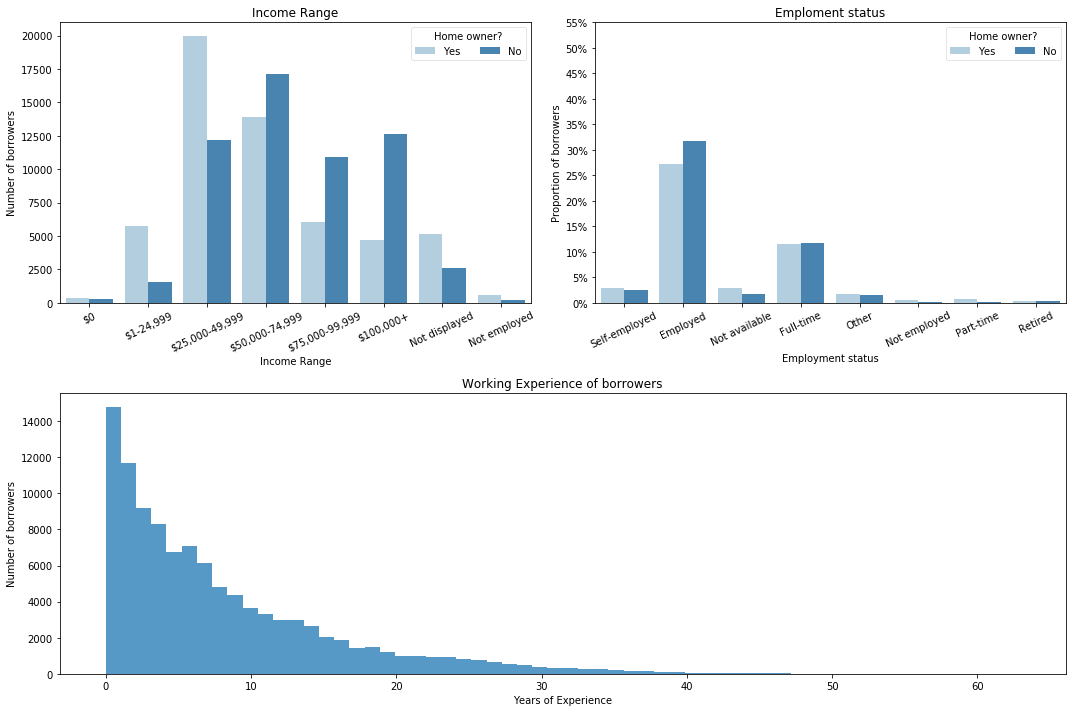

In [18]:
np.warnings.filterwarnings('ignore')

plt.figure(figsize = [15, 10])

# Income range spread
plt.subplot(2, 2, 1) # 1 row, 2 cols, subplot 1
order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed']
ax = sb.countplot(data = df2, x = 'incomerange', hue = 'isborrowerhomeowner', palette = 'Blues', order = order);
plt.xticks(rotation = 25);
plt.legend(['Yes', 'No'], loc = 1
          ,ncol = 2, framealpha = 0.5, title = 'Home owner?');
plt.xlabel('Income Range');
plt.ylabel('Number of borrowers');
plt.title('Income Range');

# Loan terms
plt.subplot(2, 2, 2) # 1 row, 2 cols, subplot 2
n_points = df2.shape[0]
max_count = df2['employmentstatus'].value_counts().max()
max_prop = max_count / n_points
order = df2['employmentstatus'].value_counts().index
# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.0%}'.format(v) for v in tick_props]
#Now plot
sb.countplot(data = df2, x= 'employmentstatus', hue = 'isborrowerhomeowner', palette = 'Blues');
plt.ylim([0,40000]);
plt.yticks(tick_props * n_points, tick_names);
plt.xticks(rotation = 25);
plt.legend(['Yes', 'No'], loc = 1
          ,ncol = 2, framealpha = 0.5, title = 'Home owner?');
plt.xlabel('Employment status');
plt.ylabel('Proportion of borrowers');
plt.title('Emploment status');

# Experience
plt.subplot(2, 1, 2) # 1 row, 2 cols, subplot 3
plt.hist(data = df2, x = 'employmentstatusduration', bins = 60, alpha = 0.75);
plt.xlabel('Years of Experience');
plt.ylabel('Number of borrowers');
plt.title('Working Experience of borrowers');

plt.tight_layout()

**What is the Income Range spread? And what is the ratio of homeownership in each range?**

From the plots above we can have a clear view of the borrowers. First of all, the majority of borrowers fall in middle (25k-49.999k and 50k-74.999k). It is important to note that around 7500 borrowers have no displayed income range, these listings are associated with loans that have the status either Chargedoff, Defaulted or Completed and are not openening for another loan. Small portions of groups of income range 0 and unemployed is present with almost negligible observations.

**How does the Employment Status of Borrowers look like? And What is the ratio of homeownership?**

I assume that home ownership is important in loan listings as it acts as an important aspect in prosper rating and risk analysis. Certainly the only groups where home owners are more than non home owners are the ((1-24.999k and 25k-49.999k). Another indication is the employment status of the borrowers, though slight differences in home ownership, most borrowers are Employed and Full-time (altogether sum up to 80% of the borrowers. Please note that due to data integrity issues, both actually yield to the same status.

**The distribution of employment experience.**

Finally, the distribution of working experience. Looking at the rightly skewed shape, most of the borrowers have less than 10 years of experience. Meaning they could be students, people looking to etablish a new career or so. Of course we have outliers that have exprience for more than 40 years, could be that already most of these individuals already retired.

The exprience and home ownership are surely going to be revisited as I believe they can bring in more effect to different aspects.

### How does the rates fare?
I am going to focus my analysis on 3 main variables, the `borrowerrate`, `borrowerapr` and `estimatedeffective yield`. The [Borrower APR](https://www.creditkarma.com/advice/i/what-is-apr/) is typically the interest rate plus any extra fees may be charged to take out a loan. It is important to address this variable along with the normal Borrower rate.

**Estimated Effective Yield measure, does the data show encouragement to lenders?**

[A nice link here for labels](https://stackoverflow.com/questions/13413112/creating-labels-where-line-appears-in-matplotlib-figure).

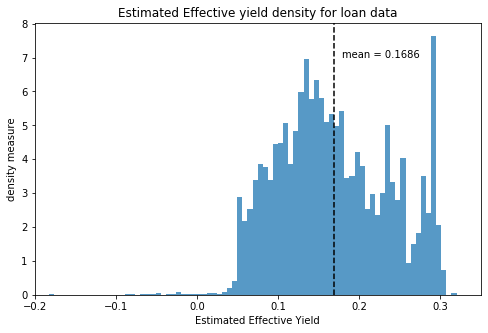

In [19]:
#close off warnings
np.warnings.filterwarnings('ignore')
#query results
dfy = df2.query('estimatedeffectiveyield != 0')
#plot
plt.figure(figsize = [8, 5])
plt.hist(data = dfy, x = 'estimatedeffectiveyield', density = True, bins = 80, histtype = 'bar', alpha = 0.75);
plt.xlim(-0.2,0.35);
plt.axvline(dfy['estimatedeffectiveyield'].mean(), color='k', linestyle='dashed', linewidth=1.5)
plt.text(dfy['estimatedeffectiveyield'].mean()+0.01, 7,'mean = 0.1686')
plt.xlabel('Estimated Effective Yield');
plt.ylabel('density measure');
plt.title('Estimated Effective yield density for loan data');

plt.show()

A bimodal distribution shows a varying estimated effective yield. A mean return of 16.86% for investors on loans and a popular yield at 0.3 shows some positive signs for investors to invest in loans requested, however it is important to note that most of the data lie at a distribution lower than the mean. Outliers at the negative yield are apparent although of much lower densities.

This means that either there are loans that have a low borrow rate or that the borrower has late fees, charged off interests or so. In terms of encouragement, investors would appeal to taking stakes in loans providing a positive return.

The next plot shows a clearer insight of the Estimated effective yield against the credit grade of the borrowers in the listing. (**Note:** I am using plotly here as it has interactive labels on hovering, which can be very helpful in such complex plot)

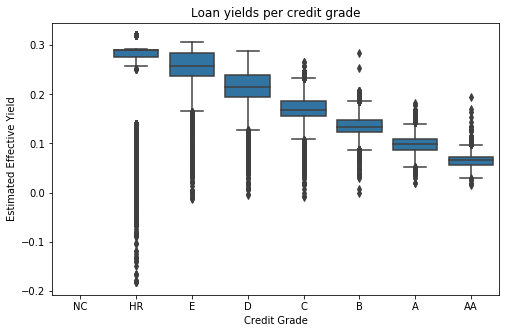

In [20]:
base_color = sb.color_palette()[0]
order = ['NC', 'HR', 'E', 'D','C','B','A','AA']

plt.figure(figsize = [8, 5])
sb.boxplot(data = df2, x = 'creditgrade', y = 'estimatedeffectiveyield', order = order, color = base_color);
plt.xlabel('Credit Grade');
plt.ylabel('Estimated Effective Yield');
plt.title('Loan yields per credit grade');

Borrowers with low credit grade (i.e. HR, E, D and possibly C) are associated with a high yield given the box plots distribution are positioned with greater mean that the better borrowers of higher credit grade. This may be due to the higher interest applied or higher fees on loans for the risky borrrowers. 

However this represents a narrow chance of return given that the interquartile range narrows down the lower the credit grade, and the presence of many outliers underneath the boxes altogether indicate the more slim opportunity of achieving the estimated yield, even loss of investment (as seen in half of the outliers of the `HR` grade fall in the negative rate zone).

The `NC` category has no data as these listings are for loans that have either been chargedoff, defaulted or cancelled.

**How does other variables correlate with the borrowing rate?**

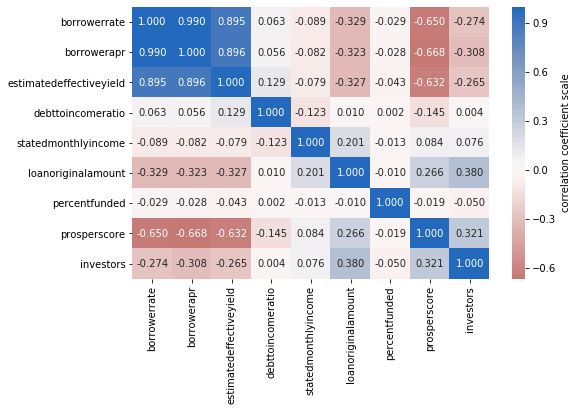

In [21]:
numeric_vars = ['borrowerrate', 'borrowerapr', 'estimatedeffectiveyield', 'debttoincomeratio', 'statedmonthlyincome'
                , 'loanoriginalamount', 'percentfunded', 'prosperscore', 'investors']

plt.figure(figsize = [8, 5])
sb.heatmap(df2[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0, cbar_kws={'label': 'correlation coefficient scale'})

plt.show()

The Borrower Rate and the Borrower APR have a high correlation, this is expected as both are related as stated before. The Estimated Effective Yield is also highly correlated with both interest rates (~0.89), this is also expected as the borrow rates would invite higher returns to investors. The Debt to Income Ratio shows a weak correlation with the Borroer Rate and Borrower APR as the coefficient is close to 0.

Now on the contrary the remaining 4 variables have a negative correlation on the Borrwer Rate and the Borrwer APR. The Prosper Score has the most effect on the rates, so with a Prosper getting a higher score they are most likely recieve a lesser rate and the opposite so.

The Loan Original Amount and the number of investors also have an effect on the rates going up or down. Finally, the Loan percent funded does not have a significant effect as the coefficient is close to 0.

**How the rates vary with the listing categories and the employment status?**

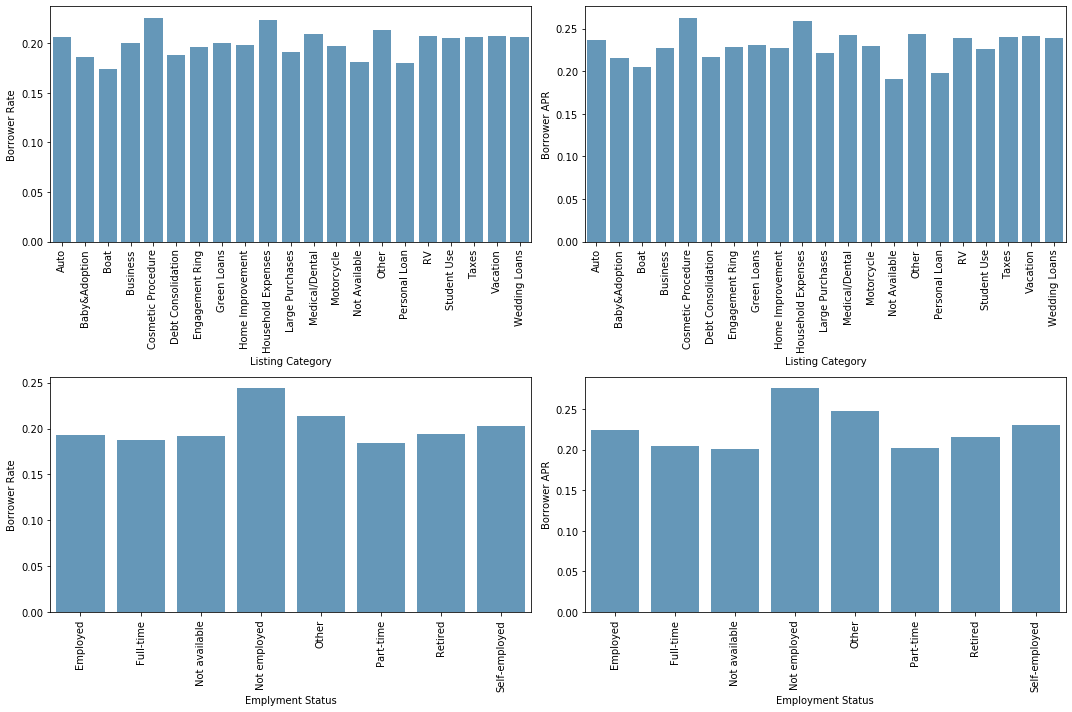

In [22]:
plt.figure(figsize = [15, 10])
plt.subplot(2, 2, 1) # 1 row, 2 cols, subplot 1
base_color = sb.color_palette()[0]
ct_counts = df2.groupby(['listingcat'])['borrowerrate', 'borrowerapr'].mean().reset_index()
sb.barplot(data = ct_counts, y = 'borrowerrate', x = 'listingcat', color = base_color, alpha = 0.75);
plt.ylabel('Borrower Rate');
plt.xlabel('Listing Category');
plt.xticks(rotation = 90);

plt.subplot(2, 2, 2) # 1 row, 2 cols, subplot 1
base_color = sb.color_palette()[0]
ct_counts = df2.groupby(['listingcat'])['borrowerrate', 'borrowerapr'].mean().reset_index()
sb.barplot(data = ct_counts, y = 'borrowerapr', x = 'listingcat', color = base_color, alpha = 0.75);
plt.ylabel('Borrower APR');
plt.xlabel('Listing Category');
plt.xticks(rotation = 90);

plt.subplot(2, 2, 3) # 1 row, 2 cols, subplot 1
base_color = sb.color_palette()[0]
ct_counts = df2.groupby(['employmentstatus'])['borrowerrate', 'borrowerapr'].mean().reset_index()
sb.barplot(data = ct_counts, y = 'borrowerrate', x = 'employmentstatus', color = base_color, alpha = 0.75);
plt.ylabel('Borrower Rate');
plt.xlabel('Emplyment Status');
plt.xticks(rotation = 90);

plt.subplot(2, 2, 4) # 1 row, 2 cols, subplot 1
base_color = sb.color_palette()[0]
ct_counts = df2.groupby(['employmentstatus'])['borrowerrate', 'borrowerapr'].mean().reset_index()
sb.barplot(data = ct_counts, y = 'borrowerapr', x = 'employmentstatus', color = base_color, alpha = 0.75);
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');
plt.xticks(rotation = 90);

plt.tight_layout()

The first subplots show the listing category (the reason for the requested loan) is shown in effect with the rates.  Now all listings seem to have near values for the rates. Showing the highest rates being associated with Cosemetic procedure and Household expenses. The listing categories need more deep look into as there are some insights there to be investigated.

Although I have some reservations on the Employment Status data due to its integrity, still looking at this categorial variable will give my motivation more information. As it can be seen, the highest rates go to the unemployed listings, and this is very logical due to the carrying risks of lending to unemployed borrowes.

Employment status 'Other'also seem second highest, but with no evidence of the accurate seggregation of this categorial value I cannot pose any observations or intuitive explanation on it.

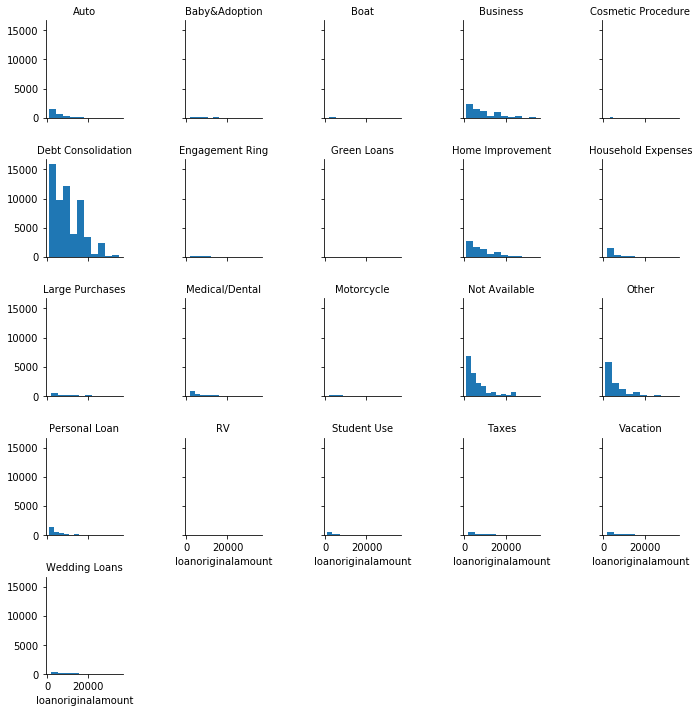

In [23]:
g = sb.FacetGrid(data = df2, col = 'listingcat', col_wrap = 5, height = 2);
g.map(plt.hist, "loanoriginalamount");
g.set_titles('{col_name}');

I took a different angle in looking at the Listing categories, faceting the values against the Loan Original Amount. Debt Consolidation seems to get the highest share of loans. So goes for taxes and vacations (second and third). It seems totally surprising that listings of the borrowers for loans are for settling other debts/consolidate debts.